# Coding assignment: traffic flow

Consider the flow of traffic on a one-lane highway.  How can we describe the general behavior of this system?

We can define the speed of traffic, $V$, in kilometers per hour.  We can also define a traffic density, the number of cars per unit length of highway, $\rho$, in cars per kilometer.  Finally, we can define a traffic flux, or the flow rate of cars, $F$ in cars per hour.  

Now make a few assumptions about how traffic moves.  

If $\rho$ approaches $0$, i.e. there are very few cars on the road, then cars will drive as fast as they can at some $V_{max}$.  

Conversely, if cars are bumper to bumper along the road, then $\rho$ approaches a $\rho_{max}$ and $V$ approaches $0$.

One possible equation to describe this behavior is

$$V=V_{max}\left(1-\frac{\rho}{\rho_{max}}\right)$$

If we describe the traffic flux, $F$ as

$$F=V\rho$$

then

$$F=F(\rho)=V(\rho)\rho=V_{max}\rho\left(1−\frac{\rho}{\rho_{max}}\right)$$

Unsteady traffic flow can be modelled as the non-linear convection of car density, so we apply the non-linear convection equation with $V$, the wave speed, equal to $\partial F/\partial \rho$:

$$\frac{\partial \rho}{\partial t}+\frac{\partial F}{\partial \rho}\frac{\partial\rho}{\partial x}=0$$

Applying the chain rule of calculus, this becomes

$$\frac{\partial\rho}{\partial t}+\frac{\partial F}{\partial x}=0$$

where $F$ is defined as above.  

Discretize the traffic flow equation using forward-difference in time and backward-difference in space.  

Examine a stretch of road 11 kilometers long using the following conditions:

$V_{max}=80\;\frac{\text{km}}{\text{hr}}$

$L=11\;\text{km}$

$\rho_{max}=250\;\frac{\text{cars}}{\text{km}}$

$nx=51$

$\Delta t=.001\;\text{hours}$

## Resolution du devoir

### Résultats de simulation : Partie A

L’idée pour ce devoir est de simuler un traffic autoroutier. Pour cela, nous commencons par écrire les conditions de bords pour la vitesse maximum ($V_{max}$) en km/h, la longueur de la route ($L$) en km, la densité maximum de circulation ($\rho_{max}$), le nombre de pas ($nx$) et la durée de chaque pas ($\Delta t$) en heure.

Nous commençons par charger la bibliothèque nympy et nous entrons directement les conditions initiales du problème

In [4]:
import numpy                       
from matplotlib import pyplot    
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [5]:
## conditions initiales données ##
Vm1 = 80        # vitesse maximum en kilomètre heure (pour la première partie du travail)
L = 11.          # longueur en kilomètre
rhom = 250       # densité maximale en nombre de voiture par kilomètre
nx = 51          # nombre de points de la grille spatiale
dt = 0.001       # durée de chaque pas en heure

In [6]:
dx = L/(nx-1)    # distance entre chaque points de nx

### conditions initiales de la densité de circulation ###
x = numpy.linspace(0,L,nx)
rho0_1 = numpy.ones(nx)*10
rho0_1[10:20] = 50

Nous avons décidés d'utiliser $\rho_0^1$ pour différencier les deux densités de circulation initiales, $\rho_0^2$ sera donc utilisé dans la deuxième partie du travail.

Nous imprimons le graphique de $\rho_0^1$ pour vérifier que la densité de circulation sur l’intervalle $L=2\;\text{km}$ et $L=4,2\;\text{km}$ est bien égale à 50. Ainsi, notre fonction est constante partout sauf sur l’intervalle considéré. 

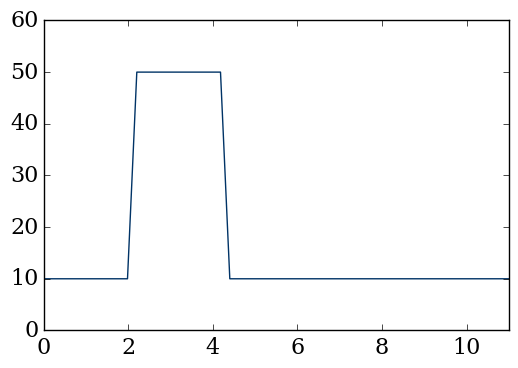

In [7]:
pyplot.plot(x, rho0_1, color='#003366', ls='-', lw=1)
pyplot.ylim(0,60);
pyplot.xlim(0,11);

Le traitement d’information qu’il va y avoir durant le devoir va passer par l’analyse de $\rho$, la variable définissant la densité de circulation. Nous allons analyser la densité de circulation en fonction du temps à l’aide d’une fonction, ici nommée traffic().

Nous discrétisons l'équation du flux de circulation
$$\frac{\partial\rho}{\partial t}+\frac{\partial F}{\partial x}=0$$
En utilisant la "forward-difference" dans le temps et la "backward-difference" dans l'espace.

$$\frac{\rho^{n+1}_i-\rho^n_i}{\Delta t} + \frac{F^n_i-F^n_{i-1}}{\Delta x} = 0$$

Où 

$$F^n_i=V_{max}\,\rho^n_i\left(1−\frac{\rho^n_i}{\rho_{max}}\right)$$


In [8]:
def traffic(nt,rho0,condition,Vm):
    """
    
    Paramètres
    ----------
    nt : tableau de float
        permet de modifier le temps de la simulation
    rho0 : tableau de float
        condition initiales de la densité de circulation
    condition : float
        condition de bord
    
    Returns
    -------
    rho : tableau de float
        densité de circulation après un nombe nt de pas
        
    """
    
    rho = rho0.copy()
    for n in range(nt): 
        rhon = rho.copy()
        F = Vm*rho.copy()*(1-rho.copy()/rhom)
        rho[1:] = rhon[1:]-dt/dx*(F[1:]-F[:-1])
        rho[0] = condition
        
    return rho

La fonction principale étant terminée nous pouvons finalement commencer à répondre aux questions posées. Nous devons donc lancer la fonction avec des temps $t=0$, $t=3$ minutes et $t=6$ minutes. Ce qui correspond à des intervalles $nt=0$ (donc à l'analyse de $\rho_0^1$), $nt=50$ et $nt=100$.

Lançons la fonction traffic() pour un temps de 3 minutes et imprimons le résultats

In [9]:
rho = traffic(50,rho0_1,10,Vm1)

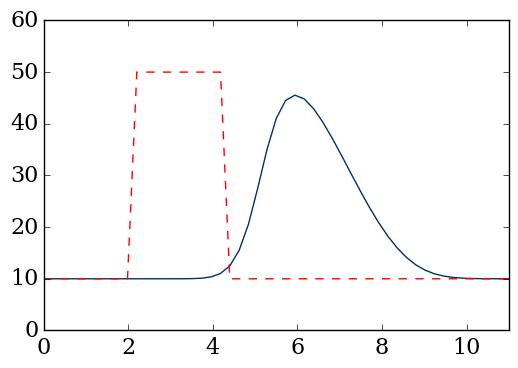

In [10]:
pyplot.plot(x, rho, color='#003366', ls='-', lw=1)
pyplot.plot(x, rho0_1, color='r', ls='--', lw=1)
pyplot.ylim(0,60);
pyplot.xlim(0,11);

En rouge pointillé nous avons $\rho_0^1$ et nous avons $\rho$ après 3 minutes en bleu. Pour avoir les valeur de la vitesse $V$ il suffit d'utiliser l'équation
$$V=V_{max}\left(1-\frac{\rho}{\rho_{max}}\right)$$

Nous définissons une fonction pour ce calcul car il est utilisé à chaque question.

In [44]:
def vitesse(rho,Vm):
    """
    Paramètres
    ----------
    rho : tableau de float
        densité de circulation en fonction de la position
    Vm : float
        vitesse maximale
    
    Returns
    -------
    V : tableau de float
        vitesse en fonction de la position
        
    """
    V = Vm*(1-rho.copy()/rhom)
    return V

#### 1. Enter the *minimum* velocity at time t = 0 in meters per second. Round to 2 decimal places

In [12]:
V = vitesse(rho0_1,Vm1)

La fonction min() nous permet de déterminer le minimum du tableau de valeurs, ici de la vitesse $V$. La vitesse est ici en $\frac{\text{km}}{\text{hr}}$, il suffit de la diviser par $3,6$ pour avoir des $\frac{\text{m}}{\text{s}}$.

In [13]:
min(V)/3.6

17.777777777777779

#### 2. Enter the average velocity at time t = 3 minutes in meters per second. Round to 2 decimal places

In [14]:
V = vitesse(rho,Vm1)

La variable $\rho$ contenait déja le tableau des valeurs de la densité de la circulation à un temps de 3 minutes étant donné qu'elle était utilisée pour le graphique.

La fonction numpy.mean() nous permet de déterminer la moyenne du tableau de valeurs, ici de la vitesse $V$. En faisant bien attention de transformer la vitesse en $\frac{\text{m}}{\text{s}}$.

In [15]:
numpy.mean(V)/3.6

20.63616619610503

#### 3. Enter the *minimum* velocity at time t = 6 minutes in meters per second. Round to 2 decimal places

Nous utilisons à nouveau la fonction traffic() mais pour $nt=100$ pour avoir $\rho$ à un temps de 6 minutes.

In [16]:
rho = traffic(100,rho0_1,10,Vm1)

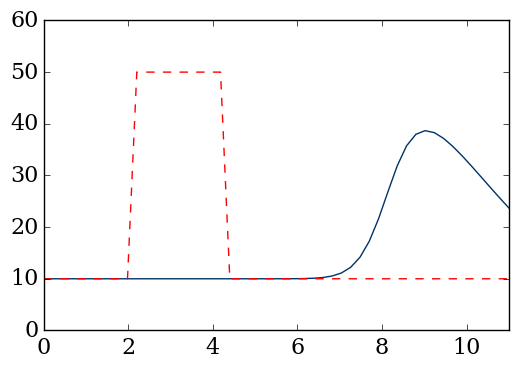

In [17]:
pyplot.plot(x, rho, color='#003366', ls='-', lw=1)
pyplot.plot(x, rho0_1, color='r', ls='--', lw=1)
pyplot.ylim(0,60);
pyplot.xlim(0,11);

Nous observons bien que le pic de densité est moins haut et s'est déplace plus loin sur la droite.

In [18]:
V = vitesse(rho,Vm1)

In [19]:
min(V)/3.6

18.784716870896442

### Résultats de simulation : Partie B

Pour cette deuxième partie, le code est identique au précédent, à l’exception des conditions initiales.

In [20]:
Vm2 = 136      # vitesse maximum en kilomètre heure (ici différente de la partie A)

A partir de maintenant nous utiliserons $\rho_0^2$ qui définit la densité de circulation initiale de la deuxième partie du devoir.

In [21]:
### conditions initiales de la densité de circulation ###
x = numpy.linspace(0,L,nx)
rho0_2 = numpy.ones(nx)*20
rho0_2[10:20] = 50

Nous imprimons le graphique de $\rho_0^2$ (en bleu) pour vérifier que la densité de circulation initiale est bien différentes de $\rho_0^1$ (en rouge pointillé). Ici la densité est égale à 20 sauf dans l'intervalle $L=2\;\text{km}$ et $L=4,2\;\text{km}$ où la densité est de 50.

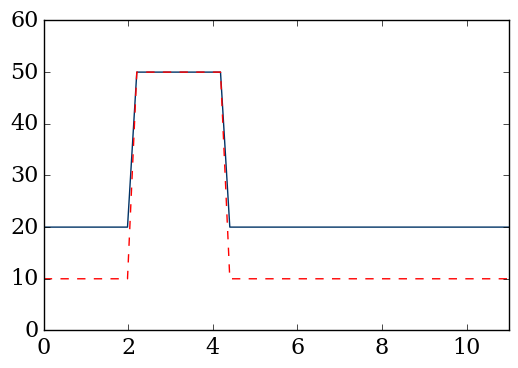

In [22]:
pyplot.plot(x, rho0_2, color='#003366', ls='-', lw=1)
pyplot.plot(x, rho0_1, color='r', ls='--', lw=1)
pyplot.ylim(0,60);
pyplot.xlim(0,11);

#### 1. Enter the *minimum* velocity at time t = 0 in meters per second. Round to 2 decimal places

In [23]:
V = vitesse(rho0_2,Vm2)

In [24]:
min(V/3.6)

30.222222222222225

#### 2. Enter the average velocity at time t = 3 minutes in meters per second. Round to 2 decimal places

Les questions sont similaire à la partie 1, aucune explication supplémentaire n'est donc nécéssaire. On remarque par contre maintenant que le pic de densité de circulation est plus avancé que au cours de la partie A du travail et ce du à la vitesse maximale qui a été augmentée.

In [25]:
rho = traffic(50,rho0_2,20,Vm2)

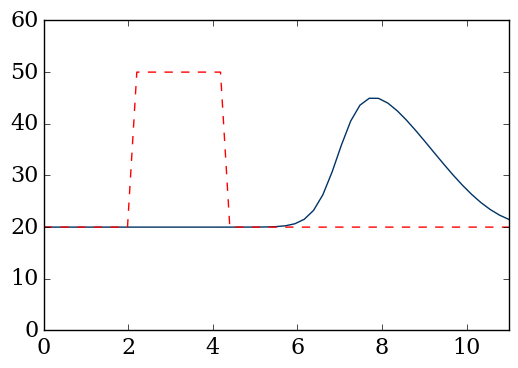

In [26]:
pyplot.plot(x, rho, color='#003366', ls='-', lw=1)
pyplot.plot(x, rho0_2, color='r', ls='--', lw=1)
pyplot.ylim(0,60);
pyplot.xlim(0,11);

In [27]:
V = vitesse(rho,Vm2)

In [28]:
numpy.mean(V)/3.6

33.872218190977073

In [29]:
min(V/3.6)

30.986402680569721

# Partie 3

Nous avons ici pris la peine de montrer l'évolution de $\rho$ au cours du temps à l'aide d'une animation. Le fonctionnement de la fonction n'est pas compliqué et est expliqué dans la quatrième lesson du module 2, nous ne prenons donc pas la peine d'expliquer en détail tout les paramètres.

Etant donné que nous faisons l'évolution de $\rho$ pour la première partie du devoir, il faut utiliser Vm1 dans la fonction diffusion().

In [36]:
from matplotlib import animation
from IPython.display import HTML

In [37]:
def diffusion(i):
    line.set_data(x,rho)
    rhon = rho.copy()
    F = Vm1*rho.copy()*(1-rho.copy()/rhom)
    rho[1:] = rhon[1:]-dt/dx*(F[1:]-F[:-1])
    rho[0] = 10

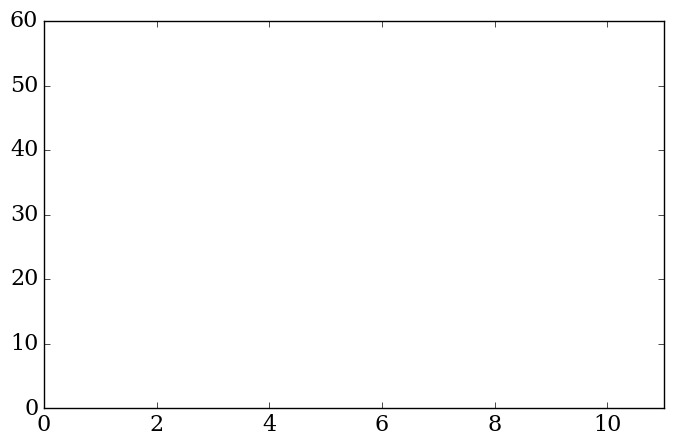

In [38]:
fig = pyplot.figure(figsize=(8,5))
ax = pyplot.axes(xlim=(0,11), ylim=(0,60))
line = ax.plot([], [], color='r', ls='--', lw=1)[0]

In [39]:
rho = rho0_1.copy()

In [40]:
anim = animation.FuncAnimation(fig, diffusion, frames=100, interval=100)

In [41]:
HTML(anim.to_html5_video())

Nous n'avons pas trouver d'autres moyens pour montrer l'évolution de $\rho$ dans la seconde partie du travail que d'utiliser une autre fonction diffusion() légèrement différente (avec des conditions de bords différentes). Nous n'avons pas trouvé pertinent de vous montrer alors la même fonction avec des paramètres différents et c'est donc pour cela que nous n'avons pas intégré l'évolution de $\rho$ selon la seconde partie du travail.

### Conclusion